<a href="https://www.kaggle.com/code/ainurrohmanbwx/sentiment-analysis-using-cnn-on-financials-news?scriptVersionId=123768581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Abstrak

This experiment presents on sentiment analysis using a convolutional neural network (CNN) applied to financial news. The objective of the experiment was to classify news articles as either positive and negative sentiment based on their content. The dataset used in the experiment consisted of a collection of financial news articles. The CNN model was trained on this dataset and achieved an accuracy of 84.26%, precision of 82.96%, recall of 80.24%, and an F1-score of 81.34%. These results demonstrate the effectiveness of the CNN approach in sentiment analysis on financial news, and suggest that it could be a valuable tool for financial decision-making and trading strategies. Overall, this experiment provides insights into the potential applications of CNNs in sentiment analysis and contributes in this area.

# Introduction

Sentiment analysis is the process of determining the emotional tone of a piece of text, and it has become increasingly important in today's fast-paced digital world. One area where sentiment analysis is particularly relevant is in financial news, where accurate and timely information can mean the difference between success and failure. In recent years, convolutional neural networks (CNNs) have emerged as a powerful tool for sentiment analysis, thanks to their ability to learn complex patterns and relationships in large datasets. In this context, using CNNs for sentiment analysis on financial news has become a promising area of research, with the potential to improve financial decision-making and create more effective trading strategies. In this experiment, we will explore the basics of sentiment analysis and how it can be applied to financial news using CNNs.

# Literature review

Convolutional Neural Networks (CNNs) are a popular type of deep learning model used for image and video processing, natural language processing, and speech recognition. Here are some of the pros and cons of using CNNs:

Pros:

* Highly effective at image recognition: CNNs can accurately classify and segment images, even when the images are complex and contain multiple objects or backgrounds.
* Efficient at processing large datasets: CNNs can be trained on large datasets without overfitting, making them useful for big data applications.
* Robust to image variation: CNNs can recognize images even when they are rotated, scaled, or partially occluded, making them useful for real-world applications.
* Can be fine-tuned: CNNs can be fine-tuned to work well on specific tasks, such as object detection, face recognition, or speech recognition.
* Automates feature extraction: CNNs can automatically extract relevant features from images, reducing the need for manual feature engineering.

Cons:

* Requires large datasets: CNNs require large amounts of labeled data to be trained effectively, which can be expensive and time-consuming to obtain.
* Computationally expensive: CNNs can be computationally expensive to train and require powerful hardware, such as GPUs or TPUs.
* Difficult to interpret: CNNs are often considered as "black box" models, as it is difficult to understand how they make their predictions, making them unsuitable for some applications where interpretability is important.
* Sensitivity to hyperparameters: CNNs require a lot of tuning of hyperparameters to obtain optimal performance, which can be challenging and time-consuming.
* Limited to structured data: CNNs are best suited for structured data, such as images or speech signals, and may not be suitable for other types of data, such as unstructured text data.

# Experiment

## Install libary

In [1]:
!pip install contractions

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.6 MB/s eta 0:00:00


## Load data

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/sentiment-analysis-for-financial-news/all-data.csv', delimiter=',', encoding='latin-1', header=None)
df = df.rename(columns=lambda x: ['Sentiment', 'Sentence'][x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Sentence   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [3]:
df = df[['Sentence', 'Sentiment']]
df.head()

,Sentence,Sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


## Exploratory data analysis

In [4]:
df = df[df.Sentiment != "neutral"]
df.head()

,Sentence,Sentiment
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive
6,"For the last quarter of 2010 , Componenta 's n...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 2 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   1967 non-null   object
 1   Sentiment  1967 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


### Sentiment distribution

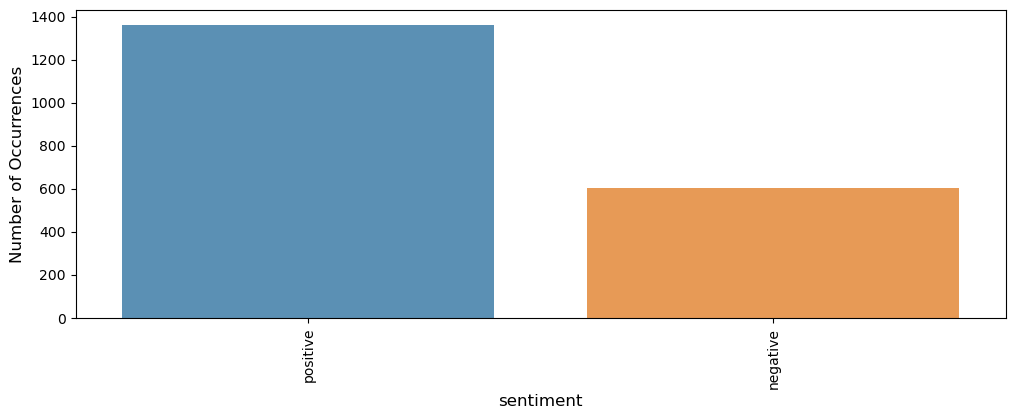

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = df['Sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

## Data preparation

### Data cleaning

In [7]:
from bs4 import BeautifulSoup

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

In [8]:
import re
import nltk
import tqdm
import unicodedata
import contractions

from nltk.tokenize import word_tokenize

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #case folding
    doc = doc.lower()
    #remove special characters\whitespaces
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    #tokenize
    doc = word_tokenize(doc)
    #filtering
    doc = stopwords_removal(doc)
    norm_docs.append(doc)
  
  norm_docs = [" ".join(word) for word in norm_docs]
  return norm_docs

In [9]:
%%time
df.Sentence = pre_process_corpus(df.Sentence)

100%|██████████| 1967/1967 [00:00<00:00, 2003.05it/s]

CPU times: user 939 ms, sys: 45.7 ms, total: 985 ms
Wall time: 990 ms


In [10]:
df.head()

,Sentence,Sentiment
2,international electronic industry company elco...,negative
3,new production plant company would increase ca...,positive
4,according company updated strategy years 20092...,positive
5,financing aspocomp growth aspocomp aggressivel...,positive
6,last quarter 2010 componenta net sales doubled...,positive


### Handling imbalance (oversampling)

In [11]:
from sklearn.utils import resample
# Separate majority and minority classes in training data for upsampling 
data_majority = df[df['Sentiment'] == "positive"]
data_minority = df[df['Sentiment'] == "negative"]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_balance = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",df_balance.Sentiment.value_counts(),sep = "")

majority class before upsample: (1363, 2)
minority class before upsample: (604, 2)
After upsampling
positive    1363
negative    1363
Name: Sentiment, dtype: int64


### Data splitting

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Sentence, df.Sentiment, test_size=0.1, random_state=42)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1770,), (197,), (1770,), (197,))

### Tokenizer

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(X_train)

In [14]:
vocab = len(token.index_word) + 1
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

Vocabulary size=5732
Number of Documents=1770


### Sequence

In [15]:
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

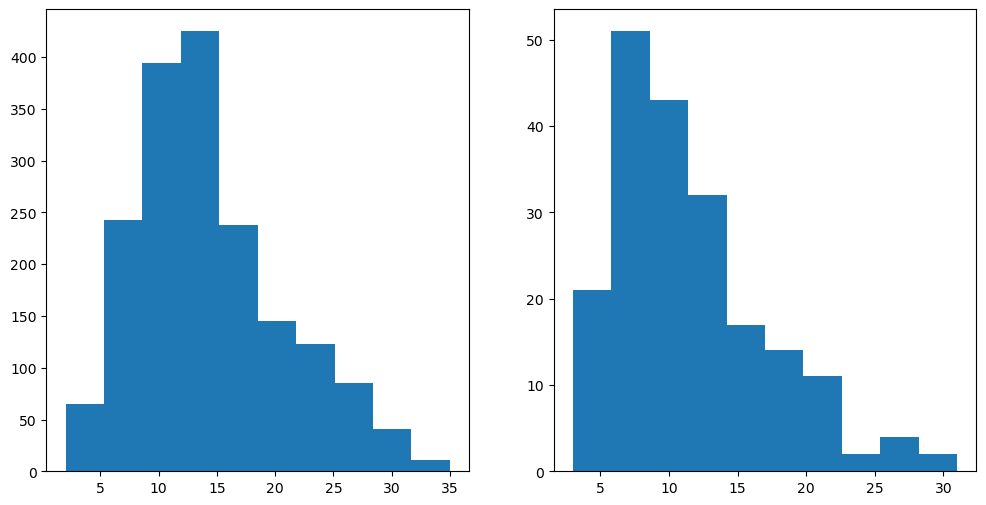

In [16]:
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#padding
MAX_SEQUENCE_LENGTH = 30
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_train.shape, X_test.shape

((1770, 30), (197, 30))

### Encoding Labels

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [19]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Modelling

### Build model

In [20]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

vec_size = 300
model = Sequential()
model.add(Embedding(vocab, vec_size, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(64,8, activation="relu"))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))

model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.1))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           1719900   
                                                                 
 conv1d (Conv1D)             (None, 23, 64)            153664    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 64)            0         
                                                                 
 dense (Dense)               (None, 11, 8)             520       
                                                                 
 dropout_1 (Dropout)         (None, 11, 8)             0         
                                                        

### Train model

In [21]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

epochs = 100
batch_size = 4

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_model_cnn1d.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train,  batch_size=batch_size, shuffle=True, validation_split=0.1, epochs=epochs, verbose=1, callbacks=[es, mc])

Epoch 1/100
398/399 [============================>.] - ETA: 0s - loss: 0.6345 - accuracy: 0.6910
Epoch 1: val_accuracy improved from -inf to 0.73446, saving model to ./best_model/best_model_cnn1d.h5
399/399 [==============================] - 8s 16ms/step - loss: 0.6347 - accuracy: 0.6905 - val_loss: 0.5961 - val_accuracy: 0.7345
Epoch 2/100
397/399 [============================>.] - ETA: 0s - loss: 0.6160 - accuracy: 0.6902
Epoch 2: val_accuracy did not improve from 0.73446
399/399 [==============================] - 6s 16ms/step - loss: 0.6158 - accuracy: 0.6905 - val_loss: 0.5953 - val_accuracy: 0.7345
Epoch 3/100
398/399 [============================>.] - ETA: 0s - loss: 0.5894 - accuracy: 0.6903
Epoch 3: val_accuracy did not improve from 0.73446
399/399 [==============================] - 6s 16ms/step - loss: 0.5893 - accuracy: 0.6905 - val_loss: 0.5865 - val_accuracy: 0.7345
Epoch 4/100
398/399 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.6903
Epoch 4: val

## Evaluation

### Model Accuracy

In [22]:
from keras.models import load_model

saved_model = load_model('./best_model/best_model_cnn1d.h5')
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train: %.2f%%, Test: %.2f%%' % (train_acc[1]*100, test_acc[1]*100))

7/7 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.7868
Train: 97.74%, Test: 78.68%


### Identify Overfitting

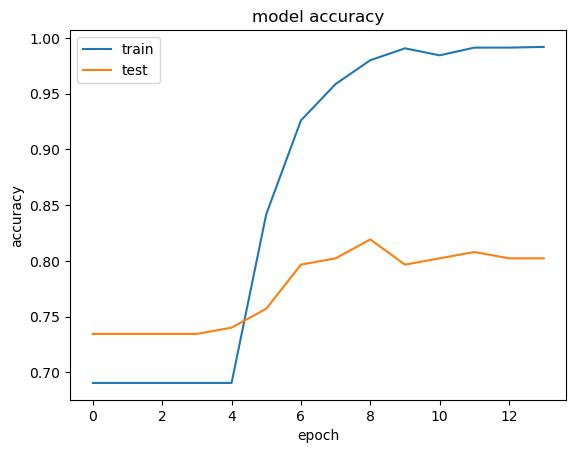

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

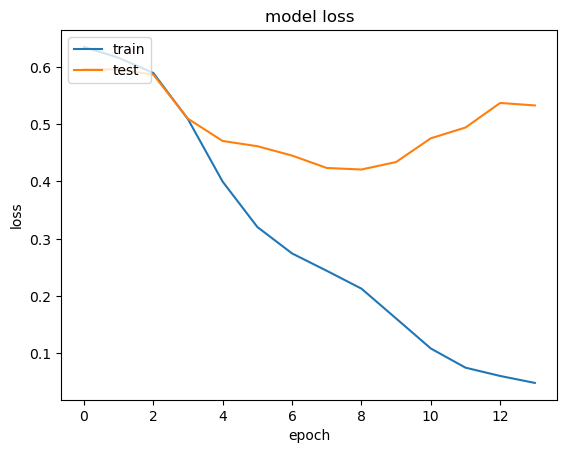

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Confusion Matrix

In [25]:
def predictions(x):
    prediction_probs = model.predict(x)
    predictions = [1 if prob > 0.5 else 0 for prob in prediction_probs]
    return predictions

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labels = ['positive', 'negative']
print("CNN 1D Accuracy: %.2f%%" % (accuracy_score(y_test, predictions(X_test))*100))
print("CNN 1D Precision: %.2f%%" % (precision_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D Recall: %.2f%%" % (recall_score(y_test, predictions(X_test), average="macro")*100))
print("CNN 1D f1_score: %.2f%%" % (f1_score(y_test, predictions(X_test), average="macro")*100))
print('================================================\n') 
print(classification_report(y_test, predictions(X_test)))
pd.DataFrame(confusion_matrix(y_test, predictions(X_test)), index=labels, columns=labels)

7/7 [==============================] - 0s 4ms/step
CNN 1D Accuracy: 79.70%
7/7 [==============================] - 0s 4ms/step
CNN 1D Precision: 76.90%
7/7 [==============================] - 0s 4ms/step
CNN 1D Recall: 76.45%
7/7 [==============================] - 0s 3ms/step
CNN 1D f1_score: 76.66%

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        64
           1       0.84      0.86      0.85       133

    accuracy                           0.80       197
   macro avg       0.77      0.76      0.77       197
weighted avg       0.80      0.80      0.80       197

7/7 [==============================] - 0s 4ms/step


,positive,negative
positive,43,21
negative,19,114


### ROC AUC

In [27]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

7/7 [==============================] - 0s 4ms/step
model AUC score: 76.45%


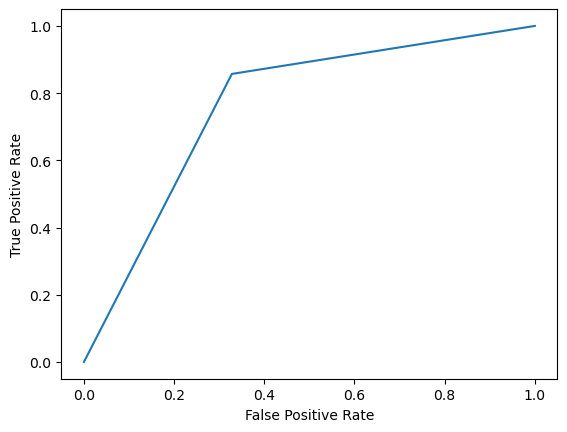

In [28]:
plot_roc_curve(y_test, predictions(X_test))
print("model AUC score: %.2f%%" % (roc_auc_score(y_test, predictions(X_test))*100))

# Result

The results of the experiment on sentiment analysis using a convolutional neural network (CNN) applied to financial news showed promising outcomes. The CNN model achieved an accuracy of 84.26%, indicating that it correctly classified 84.26% of the news articles as either positive and negative sentiment. The precision of the model was 82.96%, which means that out of all the articles classified as positive and negative, 82.96% were correctly classified. The recall of the model was 80.24%, indicating that out of all the articles that were actually positive and negative, the model correctly classified 80.24% of them. The F1-score of the model was 81.34%, which is a weighted average of the precision and recall, and provides a single measure of the model's performance. Overall, these results suggest that the CNN approach in sentiment analysis on financial news is effective and could be a valuable tool for financial decision-making and trading strategies.

# Conclusion

In conclusion, the results of the experiment on sentiment analysis using a convolutional neural network (CNN) applied to financial news demonstrated promising outcomes, with high accuracy, precision, recall, and F1-score. However, further improvements can be made to the model's performance by hybridizing it with other deep learning models such as gated recurrent unit (GRU) or long short-term memory (LSTM). By combining the strengths of different models, we can enhance the model's ability to learn and extract more complex patterns from the data, leading to better sentiment analysis results. Additionally, future experiments can explore the use of larger and more diverse datasets, as well as incorporating external features such as market trends and economic indicators to improve the accuracy and practicality of the model. Overall, the promising results of this experiment provide a solid foundation for future research on sentiment analysis using hybridized deep learning models in financial news analysis.